## Train a SPE2Vec Model

### 1. Prepare a large corpus by augmenting SMILES

In [1]:
from SmilesPE.learner import corpus_augment

In [2]:
infile = '../data/clean_chembl25.smi'
outdir = '../data/aug_chembl/'

corpus_augment(infile, outdir, cycles = 10)

### 2. Train with skip-gram algorithm

In [1]:
import codecs
from SmilesPE.tokenizer import *
from SmilesPE.spe2vec import *

Load the pre-trained SPE vocab and set up a `SPE_Tokenizer`.

In [2]:
spe_vob= codecs.open('../../SPE_ChEMBL.txt')
spe = SPE_Tokenizer(spe_vob)

In [5]:
indir = '../data/aug_chembl/'
corpus = Corpus(indir, tokenizer=spe, isdir=True, dropout=0.2)

In [6]:
%%time
model = learn_spe2vec(corpus=corpus, n_jobs=4)

CPU times: user 13h 21min 43s, sys: 43.4 s, total: 13h 22min 26s
Wall time: 11h 53min 20s


In [8]:
len(model.wv.vocab)

3114

save the model

In [10]:
model.save('../results/spe_model.bin')

## Usage of a Trained SPE2Vec Model


In [1]:
from SmilesPE.spe2vec import *

### 1. Load a Trained Model
This will return a [genism word2vec model](https://radimrehurek.com/gensim/models/word2vec.html).

In [5]:
model = load_spe2vec('../results/spe_model.bin')

In [6]:
len(model.wv.vocab)

3114

In [4]:
print(reloaded_model)

Word2Vec(vocab=3114, size=100, alpha=0.025)


### 2. Similarity Search

Find the *n* most simlair tokens.

In [32]:
new_model.wv.most_similar(positive = ['I'], topn=5)

[('I)', 0.7128984928131104),
 ('[N+](=O)[O-]', 0.7083392143249512),
 ('Br', 0.6726223230361938),
 ('=[N+]=[N-]', 0.6512905359268188),
 ('C3CCCCC3', 0.632835865020752)]

In [25]:
new_model.wv.most_similar(positive = ['Br'], topn=5)

[('[N+](=O)[O-]', 0.7984017133712769),
 ('c3ccc(Br', 0.6949862241744995),
 ('I', 0.6726224422454834),
 ('C#N', 0.647026538848877),
 ('c3ccc([N+](=O)[O-]', 0.6429217457771301)]

In [26]:
new_model.wv.most_similar(positive = ['Cl'], topn=5)

[('F', 0.6898730993270874),
 ('[N+]([O-])=O', 0.6884483098983765),
 ('C(F)(F)F', 0.675315797328949),
 ('O=[N+]([O-])', 0.6138204336166382),
 ('c1(Cl)cc(', 0.5590237379074097)]

In [27]:
new_model.wv.most_similar(positive = ['F'], topn=5)

[('(F)F', 0.7689766883850098),
 ('C(F)(F)F', 0.7498051524162292),
 ('Cl', 0.6898730993270874),
 ('FC(', 0.669197142124176),
 ('FC(F)(', 0.6604156494140625)]

In [36]:
new_model.wv.most_similar(positive = ['[N+](=O)[O-]'], topn=10)

[('Br', 0.7984017133712769),
 ('I', 0.708339273929596),
 ('C#N', 0.6947668790817261),
 ('N(CC)CC', 0.6504974365234375),
 ('c3ccc([N+](=O)[O-]', 0.6387115716934204),
 ('[N+]([O-])=O', 0.6123145818710327),
 ('[N+](=O)[O-])cc2', 0.5939745903015137),
 ('NC(=N)N', 0.5908252000808716),
 ('[N+]([O-])=O)', 0.5907192230224609),
 ('C(=N)N', 0.5786335468292236)]

In [29]:
new_model.wv.most_similar(positive = ['cccc'], topn=5)

[('cccn', 0.7426245212554932),
 ('cc', 0.6368259191513062),
 ('ncc', 0.6253657937049866),
 ('c4cccc', 0.618654191493988),
 ('cn', 0.601131796836853)]

In [37]:
new_model.wv.most_similar(positive = ['c1ccccc1'], topn=10)

[('c1cc(Br)ccc1', 0.8210796117782593),
 ('c1ccc(C(F)(F)F)cc1', 0.8167715072631836),
 ('c1ccc(C)cc1', 0.8143419027328491),
 ('c1ncccc1', 0.8109526634216309),
 ('c1cc(Cl)ccc1', 0.8099758625030518),
 ('c1ccc(Br)cc1', 0.8057501316070557),
 ('c1cc(OC)ccc1', 0.797452449798584),
 ('COc1ccccc1', 0.7923589944839478),
 ('c1ccc([N+](=O)[O-])cc1', 0.7881063222885132),
 ('c1cc(C)ccc1', 0.7868707180023193)]

Compare similarity of two tokens

In [68]:
ref = 'F'
for i in ['Cl', 'Br', 'I', 'c', 'C', 'B', '[nH]', 'O']:
    print(new_model.wv.similarity(ref, i))

0.6898731
0.387633
0.28637922
0.27690318
0.3910834
0.18097402
0.26682103
0.41482514


### 3. Get the embedding of one token

In [39]:
new_model.wv['Cl']

array([-2.02950224e-01,  1.40340686e-01,  2.67382432e-02,  9.74031091e-02,
       -1.72517717e-01,  8.01303983e-02, -7.36229196e-02, -9.51444656e-02,
        3.72148484e-01,  1.81130946e-01,  1.74484134e-01, -1.29301652e-01,
       -1.03604697e-01, -2.50630349e-01,  4.05520827e-01, -2.43114457e-01,
       -2.12318584e-01,  1.80523582e-02, -1.68795168e-01, -9.79098603e-02,
        7.37059772e-01, -1.00865168e-02,  3.67026001e-01, -5.12824394e-02,
       -5.35637774e-02,  7.80568644e-03, -4.06715780e-01,  1.34660244e-01,
        7.20059797e-02, -2.08876193e-01, -1.00592591e-01,  9.60482061e-02,
       -2.87714094e-01, -3.32500666e-01, -7.18628839e-02, -2.87026674e-01,
       -1.61783621e-01, -4.23521474e-02,  1.38721481e-01,  1.18507959e-01,
       -1.22052059e-01,  4.58160996e-01, -1.06491186e-01, -8.75373706e-02,
       -1.00945957e-01, -9.78194326e-02, -1.70962840e-01, -7.79090226e-02,
        1.30518824e-01, -4.17784601e-01,  1.55221280e-02, -2.45539263e-01,
       -2.69203156e-01, -

### 4. `class SPE2Vec()`
`SPE2Vec` takes two input: `spe2vec model path` and `tokenizer`

three methods:
- tokenize: return the toeknized SMILES as a list
- Generate a vector for a SMILES. The vector is construc in four modes: ['average', 'sum', 'avg_pool', 'sum_pool']. The Unknown token will be skipped.
- spe2vec: Generate a list of vectors (np.array). Each vector is spe vector of each token. The unknown token will be represented by the mean of all token vectors from the model if `skip_unknown` is set to False.
        
        

In [8]:
import codecs
from SmilesPE.tokenizer import *
spe_vob= codecs.open('../../SPE_ChEMBL.txt')
spe = SPE_Tokenizer(spe_vob)

In [10]:
spe2vec = SPE2Vec('../results/spe_model.bin', spe)

In [12]:
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [11]:
smi = 'CC(=O)NCCC1=CNc2c1cc(OC)cc2CC(=O)NCCc1c[nH]c2ccc(OC)cc12'

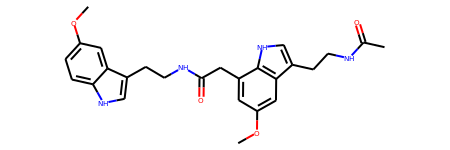

In [13]:
mol = Chem.MolFromSmiles(smi)
mol

In [15]:
toks = spe2vec.tokenize(smi)
toks

'CC(=O)N CCC1 = CN c2 c1cc(OC) cc2 CC(=O)N CC c1c[nH] c2ccc(OC) cc12'

In [18]:
smivec = spe2vec.smiles2vec(smi, mode='average')
smivec.shape

(100,)

In [19]:
smivec = spe2vec.smiles2vec(smi, mode='avg_pool')
smivec.shape

(300,)

In [22]:
smivec = spe2vec.spe2vec(smi)
len(smivec), smivec[0].shape

(12, (100,))